In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Wine Reviews dataset

There were two data files: *_first150k.csv and *-130k-v2.csv. I chose to use the latter because as the author of the data describes (https://www.kaggle.com/zynicide/wine-reviews), the second version has more information to erase duplicate rows. 

In [2]:
wine_reviews = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")
len(wine_reviews)

129971

In [3]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Remove duplicate entries

In [4]:
wine_reviews = wine_reviews.drop_duplicates('description')
len(wine_reviews)

119955

We see that there were 10,016 duplicate entries. 

### Extract only Vinho Verde reviews

In [5]:
wine_reviews_VV = wine_reviews[wine_reviews['province'] == 'Vinho Verde']
len(wine_reviews_VV)

382

In [6]:
wine_reviews_VV.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
613,613,Portugal,"With its light prickle on the tongue, this is ...",Paço de São Lourenço,87,12.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Solar de Pinheiro 2012 Paço de São Lourenço Wh...,Portuguese White,Solar de Pinheiro
723,723,Portugal,"In a medium sweet style, the wine has a light ...",Santola,85,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Messias 2015 Santola White (Vinho Verde),Portuguese White,Messias
726,726,Portugal,A rose pink colored wine that is dry and with ...,Casa de Paços,85,9.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Quinta de Paços 2015 Casa de Paços Rosé (Vinho...,Rosé,Quinta de Paços
907,907,Portugal,A fresh lemon-flavored wine with crisp acidity...,Bruto,87,30.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Casa de Vilacetinho 2013 Bruto Avesso (Vinho V...,Avesso,Casa de Vilacetinho
927,927,Portugal,This is crisp and fresh medium-sweet wine. It ...,Casal Garcia Rosé,87,12.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Aveleda NV Casal Garcia Rosé Sparkling (Vinho ...,Portuguese Sparkling,Aveleda


### Histograms

First check the general histogram of the entire dataset

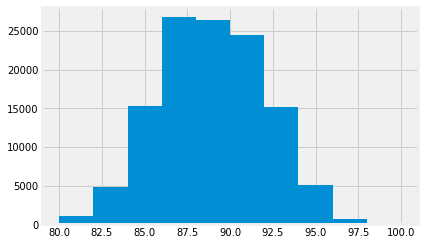

In [7]:
wine_reviews['points'].hist(bins = 10)

Next check the histogram of only Vinho Verdes

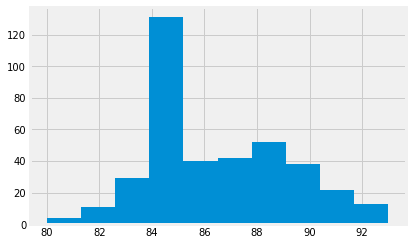

In [8]:
wine_reviews_VV['points'].hist(bins = 10)

### Assigning *logit_scores*
We assign a binary score of {0, 1} based on whether a wine is excellent or good. The cut-off is arbitrary; we choose to classify the top $20\%$ of wines as excellent. 

In [9]:
len(wine_reviews[wine_reviews['points'] >= 92])/len(wine_reviews)*100

17.619107165186946

In [10]:
len(wine_reviews_VV[wine_reviews_VV['points'] >= 92])/len(wine_reviews_VV)*100

3.4031413612565444

In [11]:
len(wine_reviews_VV[wine_reviews_VV['points'] >= 90])/len(wine_reviews_VV)*100

19.10994764397906

We notice that while a threshold of $92$ constitutes $\sim 18\%$ of all the reviews, it is a rather high threshold for Vinho Verdes; only $\sim 3.4\%$ Vinho Verdes meet the cut-off. Thus, we choose a threshold of $90$ which gives us roughly $20\%$ of Vinho Verdes as excellent. 

In [12]:
wine_reviews_VV['logit_score'] = wine_reviews_VV['points'] >= 90
wine_reviews_VV = wine_reviews_VV.replace({False:0, True:1})
print(len(wine_reviews_VV))
wine_reviews_VV

382


C:\Users\tanve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,logit_score
613,613,Portugal,"With its light prickle on the tongue, this is ...",Paço de São Lourenço,87,12.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Solar de Pinheiro 2012 Paço de São Lourenço Wh...,Portuguese White,Solar de Pinheiro,0
723,723,Portugal,"In a medium sweet style, the wine has a light ...",Santola,85,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Messias 2015 Santola White (Vinho Verde),Portuguese White,Messias,0
726,726,Portugal,A rose pink colored wine that is dry and with ...,Casa de Paços,85,9.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Quinta de Paços 2015 Casa de Paços Rosé (Vinho...,Rosé,Quinta de Paços,0
907,907,Portugal,A fresh lemon-flavored wine with crisp acidity...,Bruto,87,30.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Casa de Vilacetinho 2013 Bruto Avesso (Vinho V...,Avesso,Casa de Vilacetinho,0
927,927,Portugal,This is crisp and fresh medium-sweet wine. It ...,Casal Garcia Rosé,87,12.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Aveleda NV Casal Garcia Rosé Sparkling (Vinho ...,Portuguese Sparkling,Aveleda,0
1279,1279,Portugal,"A just off-dry Vinho Verde, fresh and spritzy....",Praia,84,NaN,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Aveleda 2010 Praia White (Vinho Verde),Portuguese White,Aveleda,0
1308,1308,Portugal,This blend of Alvarinho and Trajadura is initi...,Torre de Menagem Escolha,89,13.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Quintas de Melgaço 2014 Torre de Menagem Escol...,Portuguese White,Quintas de Melgaço,0
1555,1555,Portugal,This is a soft wine with its creamy fruits ass...,Arca Nova Branco,85,9.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Quinta das Arcas 2016 Arca Nova Branco White (...,Portuguese White,Quinta das Arcas,0
2094,2094,Portugal,"A fine, crisp wine, with delicious green apple...",Solar de Serrade,87,17.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Quinta de Serrade 2006 Solar de Serrade Alvari...,Alvarinho,Quinta de Serrade,0
2273,2273,Portugal,"Crisp. dry and fruity, this wine has a light t...",Azul Portugal Escolha,85,11.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Wines & Winemakers 2012 Azul Portugal Escolha ...,Portuguese White,Wines & Winemakers,0


Save the dataset

In [13]:
wine_reviews_VV.to_csv("wine-reviews-final.csv")

## Wine Quality dataset

First read in wine quality data

In [14]:
wine_quality = pd.read_csv("wine-quality/winequalityN.csv")

In [15]:
len(wine_quality)

6497

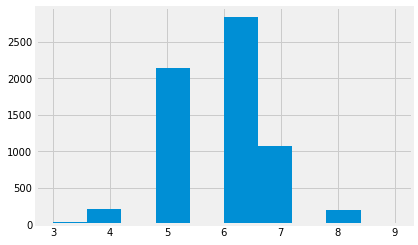

In [16]:
wine_quality['quality'].hist(bins = 10)

### Duplicate Removal
Check how many duplicated rows are there:

In [17]:
len(wine_quality[wine_quality.duplicated()])

1168

Drop all the duplicate rows

In [18]:
wine_quality = wine_quality.drop_duplicates()
len(wine_quality)

5329

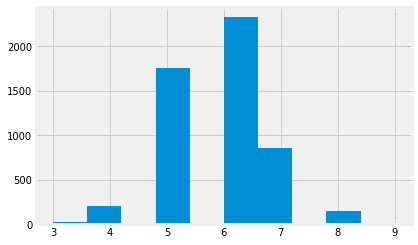

In [19]:
wine_quality['quality'].hist()

### NaN rows removal
Remove any wine reviews that has NaN values in any of the columns

In [20]:
wine_quality = wine_quality.dropna()
len(wine_quality)

5295

### Assigning *logit_score*

We see that scores 7+ form roughly 20% of the sample.

In [21]:
len(wine_quality[wine_quality['quality'] >= 7])/len(wine_quality)*100

18.980169971671387

Hence we define a binary classification *logit_score* = {$0, 1$} where if the *quality* score of a wine is $>= 7$ then it is given a *logit_score* of $1$.

In [22]:
wine_quality['logit_score'] = wine_quality['quality'] >= 7
wine_quality = wine_quality.replace({False:0, True:1})
wine_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,logit_score
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


### Randomly sampling $n$ wines from the dataframe

In [23]:
#number of samples
n = len(wine_reviews_VV) #same length as the final review dataset
df_final = wine_quality.sample(n)

len(df_final)

382

In [24]:
df_final.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,logit_score
971,white,6.0,0.27,0.19,1.7,0.020,24.0,110.0,0.98980,3.32,0.47,12.6,7,1
4305,white,5.9,0.25,0.24,7.4,0.044,21.0,113.0,0.99462,3.38,0.58,10.5,6,0
5597,red,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,6,0
2755,white,6.6,0.34,0.18,6.4,0.082,47.0,240.0,0.99710,3.42,0.48,9.2,5,0
5664,red,8.8,0.59,0.18,2.9,0.089,12.0,74.0,0.99738,3.14,0.54,9.4,5,0


Save the sampled dataset

In [25]:
df_final.to_csv("wine-quality_preprocessed.csv")